In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vega_datasets

# Intro: Beyond Matplotlib


* Matplotlib is great and by far the most versatile library (and the basis for all of these!), but there are situations where its annyoing
* Sometimes, you just want to quickly and easily create plots with one command
* Sometimes you want interactive plots

make sure to install the requirements in *requirements.txt* using `pip install -r requirements.txt`

In [2]:
import vega_datasets
cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median(numeric_only=True))
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

In [3]:
import seaborn as sns
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

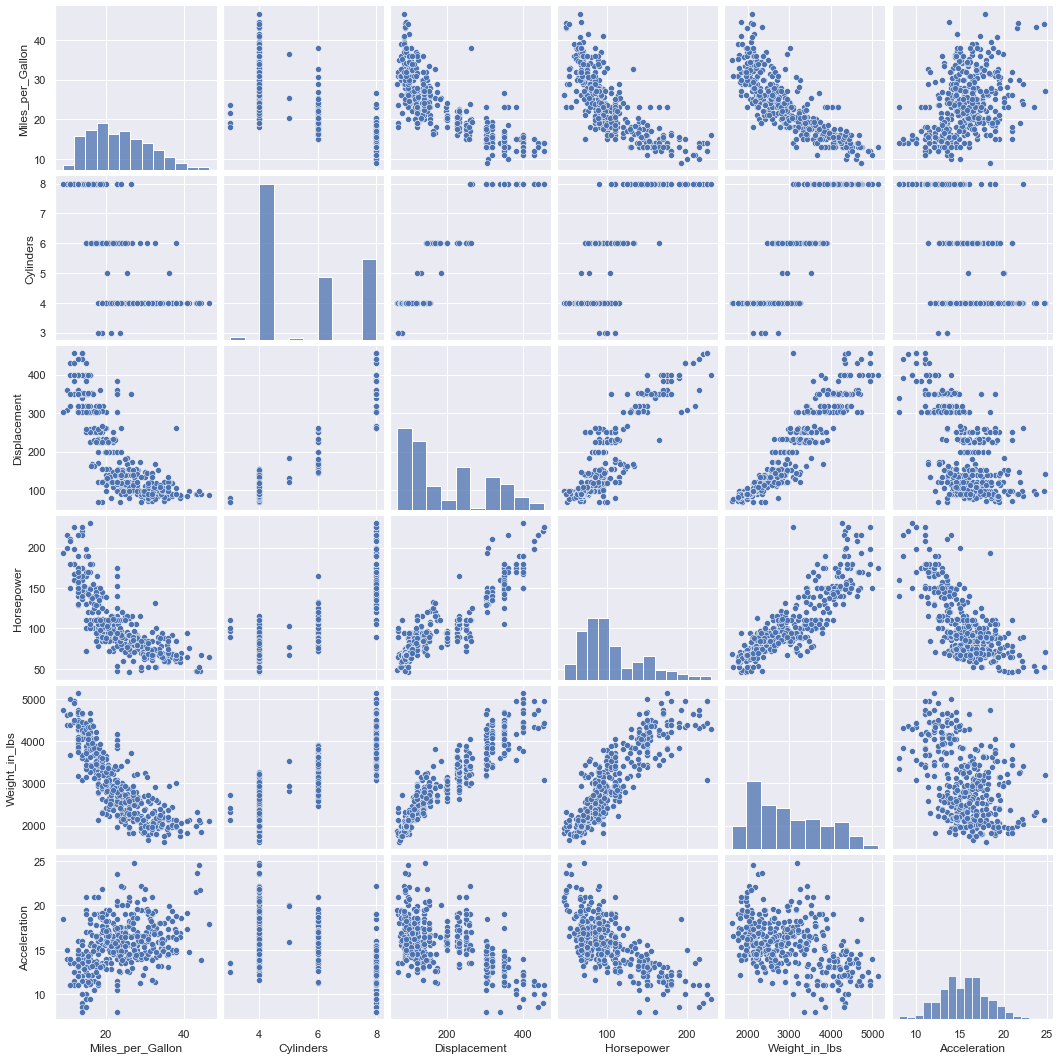

In [4]:
#there are some types of plot that seaborn is just perfect for:
import seaborn as sns
sns.set()
sns.pairplot(cars);

In [5]:
#Some interactive things are easiest in plotly...
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello Figure')
fig.show();

In [6]:
# explore your data using widgets!
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def plot_sex_distribution(dataset, agerange):
    dataset = dataset[dataset['Age'].between(agerange[0], agerange[1])]
    (dataset['Sex'].value_counts()/dataset['Sex'].count()).plot(kind='bar')
    
interactive(plot_sex_distribution, dataset=fixed(titanic), agerange=widgets.FloatRangeSlider(min=titanic['Age'].min(), max=titanic['Age'].max()))

interactive(children=(FloatRangeSlider(value=(20.315, 60.105), description='agerange', max=80.0, min=0.42), Ou…


# Statistical Visualization
Statistical visualization is a subfield of visualization that focuses on representing data with plots. Statistical visualization is probably the most important part of exploratory data analysis, as we as humans are very good at processing visual information. 

### Pandas plotting
http://pandas.pydata.org/pandas-docs/stable/visualization.html </br>
The plotting utilities are probably the quickest way to turn a dataframe into graphics. 


| Pros                          | Cons                           |
|-------------------------------|--------------------------------|
| no new dependency             | limited cababilities           |
| quick and easy                | does not look great by default |
| customizable with matplotlib  |                                |
| official pandas support       |                                |
| extensible                    |                                |


### Seaborn
http://seaborn.pydata.org/ </br>
Seaborn is high level plotting package built on matplotlib.

| Pros                         | Cons                                                 |
|------------------------------|------------------------------------------------------|
| real Python package          | only elements of a grammar                           |
| very powerful features       | not so easily composable                             |
| customizable with matplotlib | non-default-plots can get messy                      |
| great look by default!       |                                                      |
| good support                 |                                                      |
| wide adoption                |                                                      |
| really quick plots           |                                                      |



### Plotly
https://plotly.com/python/ </br>
Plotly is an interactive, open-source, and browser-based graphing library for Python.
It automatically creates Javascript-Plots from Python-Commands, such that even the simplest plots are interactive and can be exported to the web. 

| Pros                                 | Cons                             |
|--------------------------------------|----------------------------------|
| automatic HTML creation and export   | not customizable with matplotlib |
| can replace matplotlib in some cases | Targetedtowards Enterprises     |
| very active support                  | not pre-implemented plots impossible|
| great support for Jupyterlab         |                                  |
| targets the web                      |                                  |


### Jupyter-Widgets
https://github.com/jupyter-widgets/ipywidgets </br>
Are not a plotting library, but rather add interactive elements like sliders etc. to your ipynb-file, such that you can make your plots interactive

| Pros                                 | Cons                                       |
|--------------------------------------|--------------------------------------------|
| look great in jupyter notebooks      | not possible in python-scripts and prints  |

## The Datasets
In this lecture we look at the cars dataset, which is mainly interesting because it has so many different variables.

In [7]:
cars = vega_datasets.data.cars()
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

In [8]:
cars.describe()

Miles_per_Gallon   Cylinders  Displacement  Horsepower  Weight_in_lbs  \
count        398.000000  406.000000    406.000000  400.000000     406.000000   
mean          23.514573    5.475369    194.779557  105.082500    2979.413793   
std            7.815984    1.712160    104.922458   38.768779     847.004328   
min            9.000000    3.000000     68.000000   46.000000    1613.000000   
25%           17.500000    4.000000    105.000000   75.750000    2226.500000   
50%           23.000000    4.000000    151.000000   95.000000    2822.500000   
75%           29.000000    8.000000    302.000000  130.000000    3618.250000   
max           46.600000    8.000000    455.000000  230.000000    5140.000000   

       Acceleration  
count    406.000000  
mean      15.519704  
std        2.803359  
min        8.000000  
25%       13.700000  
50%       15.500000  
75%       17.175000  
max       24.800000

We fill up the few NA values.

In [9]:
print(cars[cars.isna().any(axis=1)])

cars = cars.fillna(cars.median(numeric_only=True))

                                 Name  Miles_per_Gallon  Cylinders  \
10               citroen ds-21 pallas               NaN          4   
11   chevrolet chevelle concours (sw)               NaN          8   
12                   ford torino (sw)               NaN          8   
13            plymouth satellite (sw)               NaN          8   
14                 amc rebel sst (sw)               NaN          8   
17              ford mustang boss 302               NaN          8   
38                         ford pinto              25.0          4   
39        volkswagen super beetle 117               NaN          4   
133                     ford maverick              21.0          6   
337              renault lecar deluxe              40.9          4   
343                ford mustang cobra              23.6          4   
361                       renault 18i              34.5          4   
367                         saab 900s               NaN          4   
382                 

In [10]:
import seaborn as sns
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
cars.describe()

Miles_per_Gallon   Cylinders  Displacement  Horsepower  Weight_in_lbs  \
count        406.000000  406.000000    406.000000  406.000000     406.000000   
mean          23.504433    5.475369    194.779557  104.933498    2979.413793   
std            7.738736    1.712160    104.922458   38.499806     847.004328   
min            9.000000    3.000000     68.000000   46.000000    1613.000000   
25%           17.500000    4.000000    105.000000   76.000000    2226.500000   
50%           23.000000    4.000000    151.000000   95.000000    2822.500000   
75%           29.000000    8.000000    302.000000  129.000000    3618.250000   
max           46.600000    8.000000    455.000000  230.000000    5140.000000   

       Acceleration  
count    406.000000  
mean      15.519704  
std        2.803359  
min        8.000000  
25%       13.700000  
50%       15.500000  
75%       17.175000  
max       24.800000

.
# Pandas Plotting

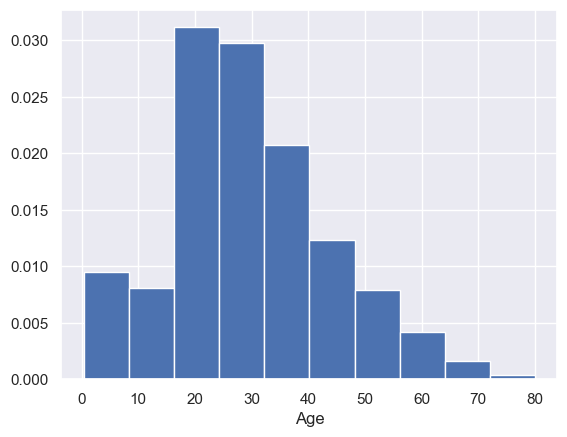

In [12]:
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

In [13]:
", ".join(plt.style.available)

'Solarize_Light2, _classic_test_patch, _mpl-gallery, _mpl-gallery-nogrid, bmh, classic, dark_background, fast, fivethirtyeight, ggplot, grayscale, seaborn, seaborn-bright, seaborn-colorblind, seaborn-dark, seaborn-dark-palette, seaborn-darkgrid, seaborn-deep, seaborn-muted, seaborn-notebook, seaborn-paper, seaborn-pastel, seaborn-poster, seaborn-talk, seaborn-ticks, seaborn-white, seaborn-whitegrid, tableau-colorblind10'

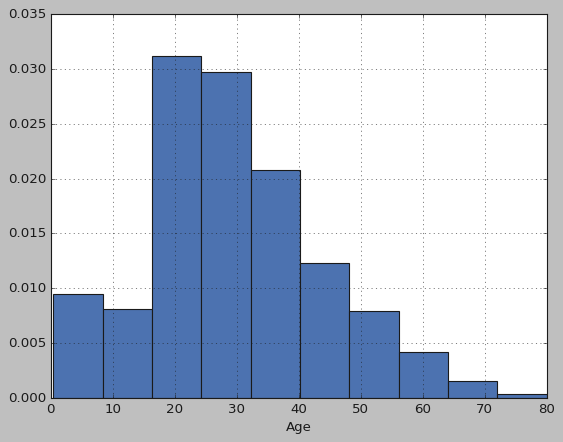

In [14]:
plt.style.use('classic')
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

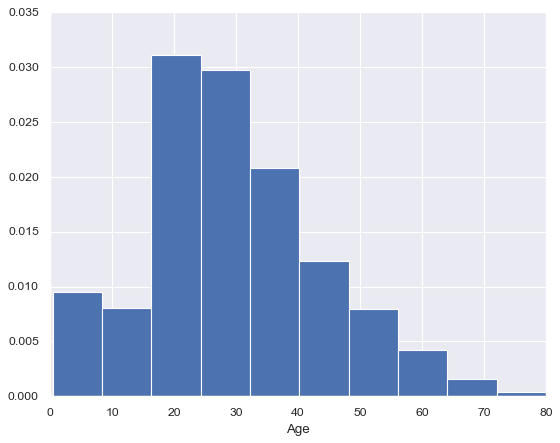

In [15]:
sns.set()
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age');

# Seaborn
`seaborn` abstracts commonly used plots in functions that can be customized with arguments. 

We import seaborn under its common abbreviation `sns`. With `sns.set` we can change the styling and behavior of the plots. Calling it without arguments just activates the defaults. One strenght of seaborn is its very nice styling.

In [16]:
import seaborn as sns

sns.set()

Let's reset our dataset to its original form.

In [17]:
import vega_datasets
cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median(numeric_only=True))
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

We can now make a scatterplot matrix of all numeric variables with a single function call. 

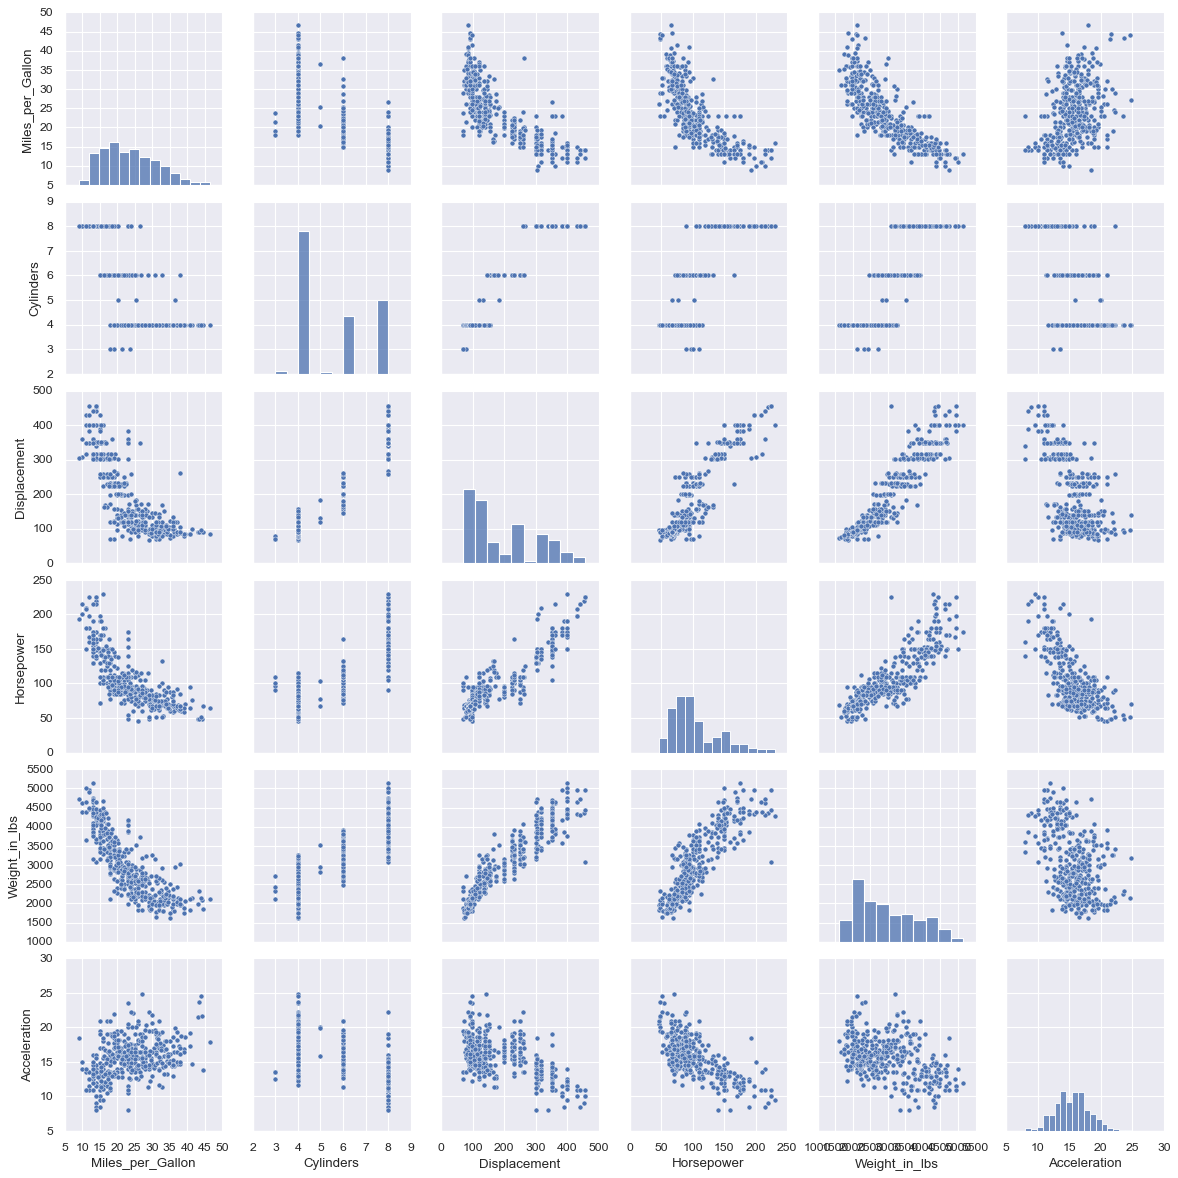

In [18]:
sns.pairplot(cars)

Seaborn also has the idea of aesthetic mappings. However, they are realized with keyword arguments that you pass to the functions and not with a separate `aes` object.

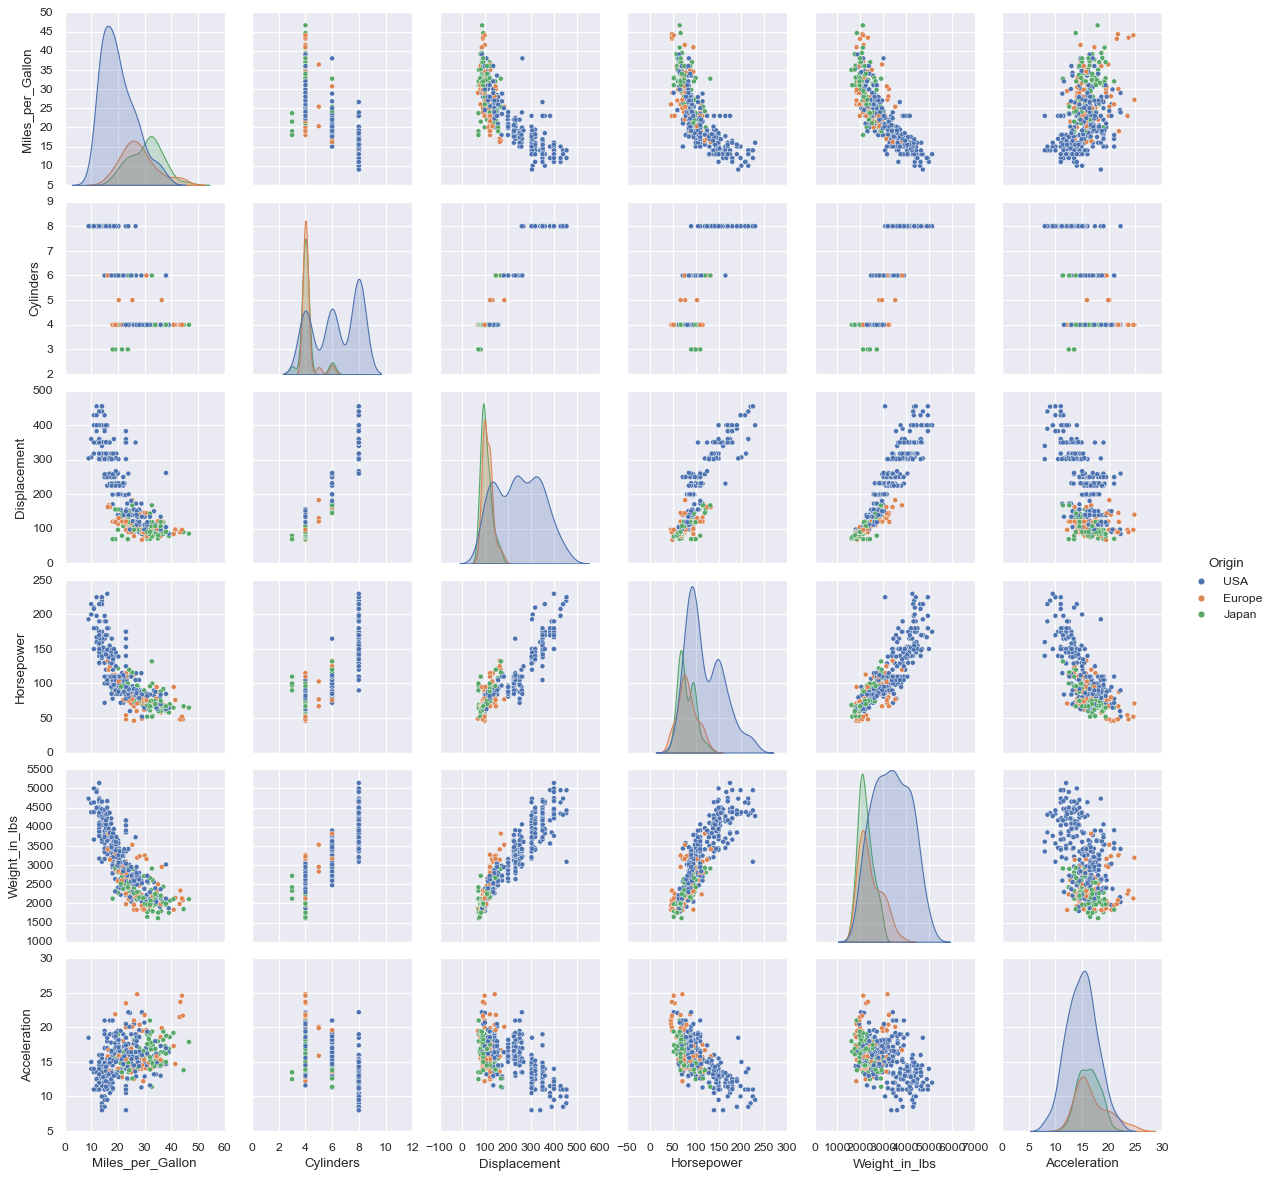

In [19]:
sns.pairplot(cars, hue='Origin')

## Exploring a single variable

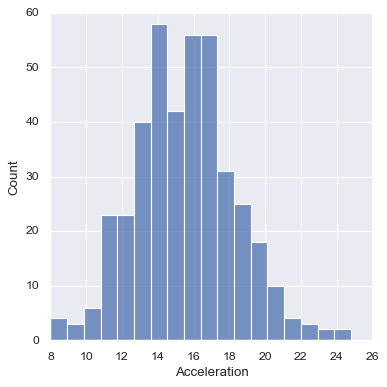

In [20]:
sns.displot(cars['Acceleration'])

<AxesSubplot:xlabel='Acceleration'>

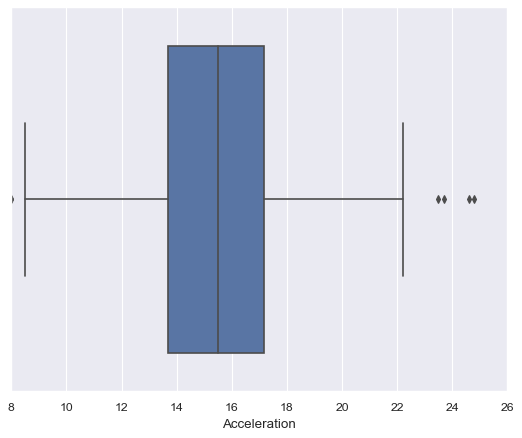

In [21]:
sns.boxplot(x='Acceleration', data=cars)

## Exploring the relation of one continuous and one categorical variable


<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

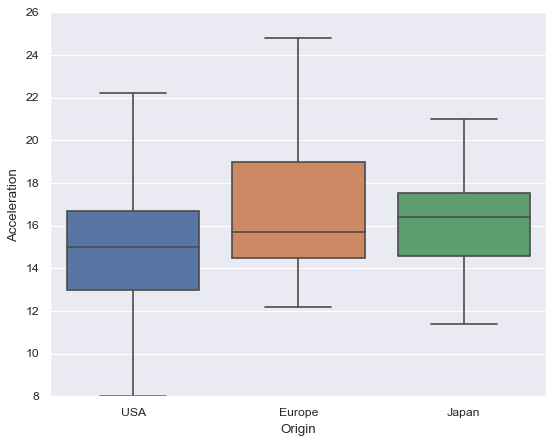

In [22]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

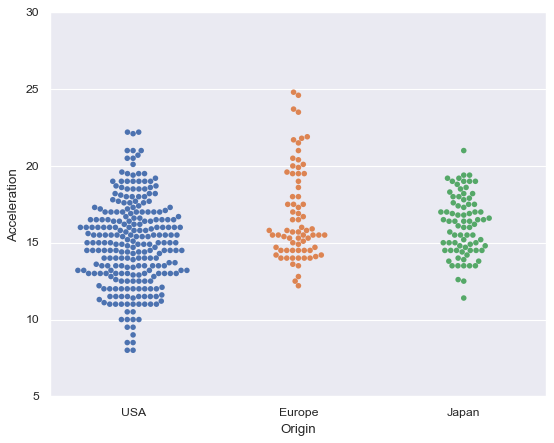

In [23]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars)

Multiple plots can be combined by calling function after another.

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

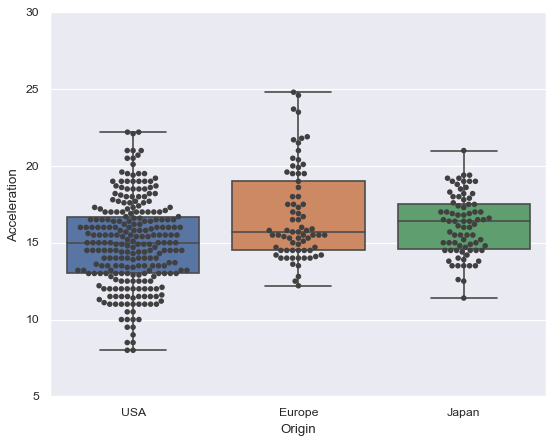

In [24]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)
sns.swarmplot(x='Origin', y='Acceleration', color='0.25', data=cars)

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

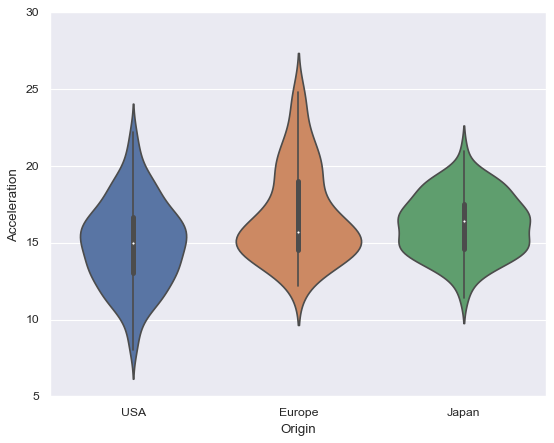

In [25]:
sns.violinplot(y='Acceleration', x='Origin', data=cars)

Let's create a binary variable, to demonstrate a nice twist for vioinplots.

In [26]:
cars['age'] = pd.cut(cars['Year'], bins=2, labels=['old', 'young'])

Using `split=True` each violing will show a different density, determined by the binary variable.

<AxesSubplot:xlabel='Origin', ylabel='Acceleration'>

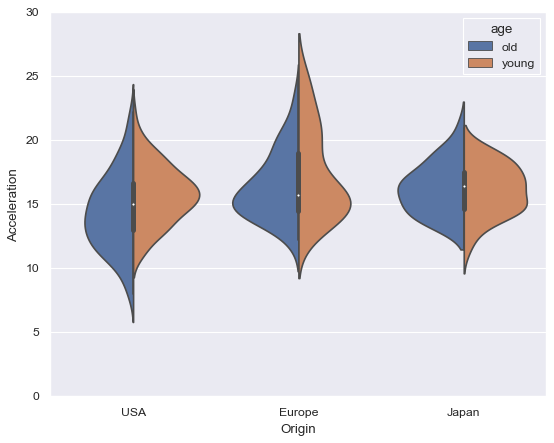

In [27]:
sns.violinplot(y='Acceleration', x='Origin', hue='age', split=True, data=cars)

## Exploring the relation of two continuous variables

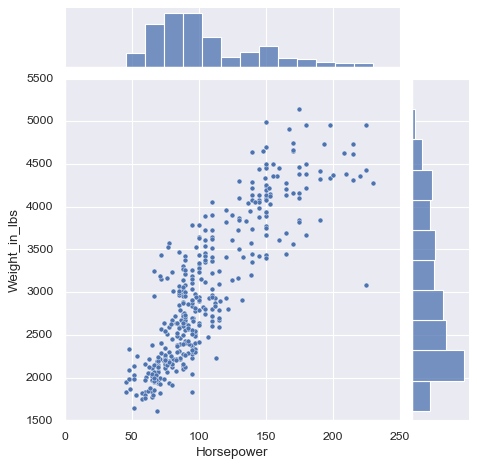

In [28]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', data=cars)

A "hexbin" plot is a kind of two dimensional histogram. Another way to avoid overplotting...

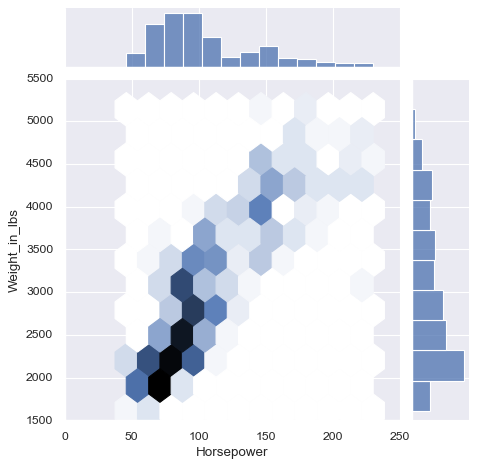

In [29]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='hex', data=cars)

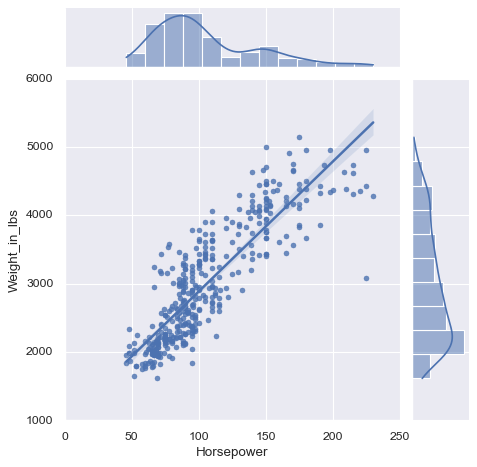

In [30]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='reg', data=cars)

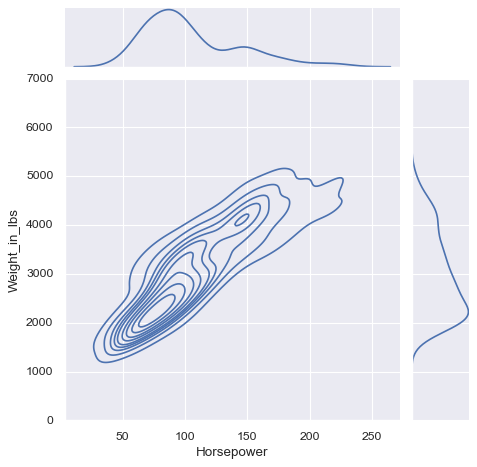

In [31]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='kde', data=cars)

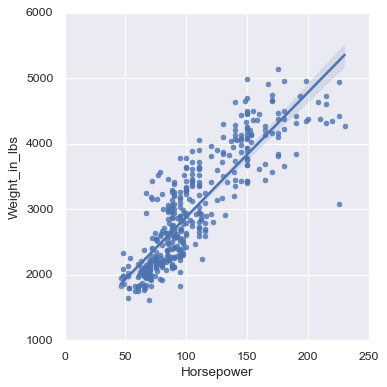

In [32]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', data=cars)

Many types of plots support **faceting** via the `col` or `row` argument.

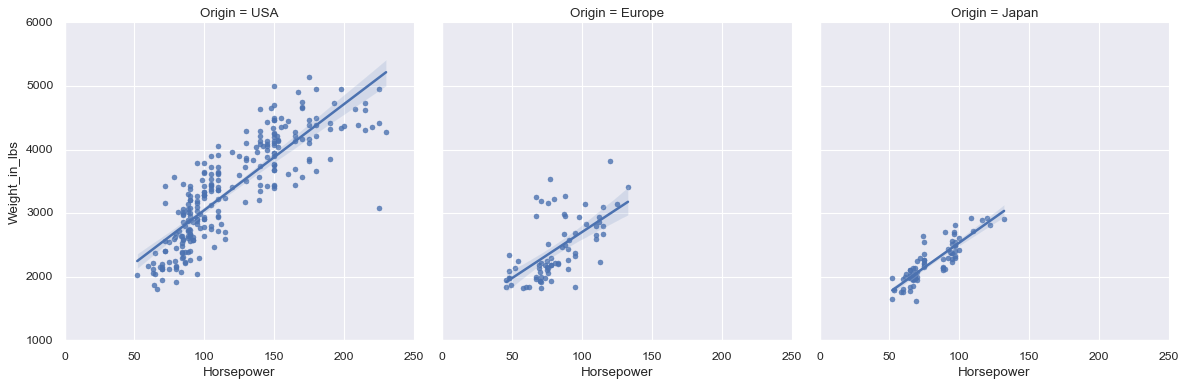

In [33]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', col='Origin', data=cars)

More complex facet plot can be created by first creating a `FacetGrid` object and then mapping a plotting function to each subplot.

In [34]:
cars['year_int'] = cars['Year'].dt.year

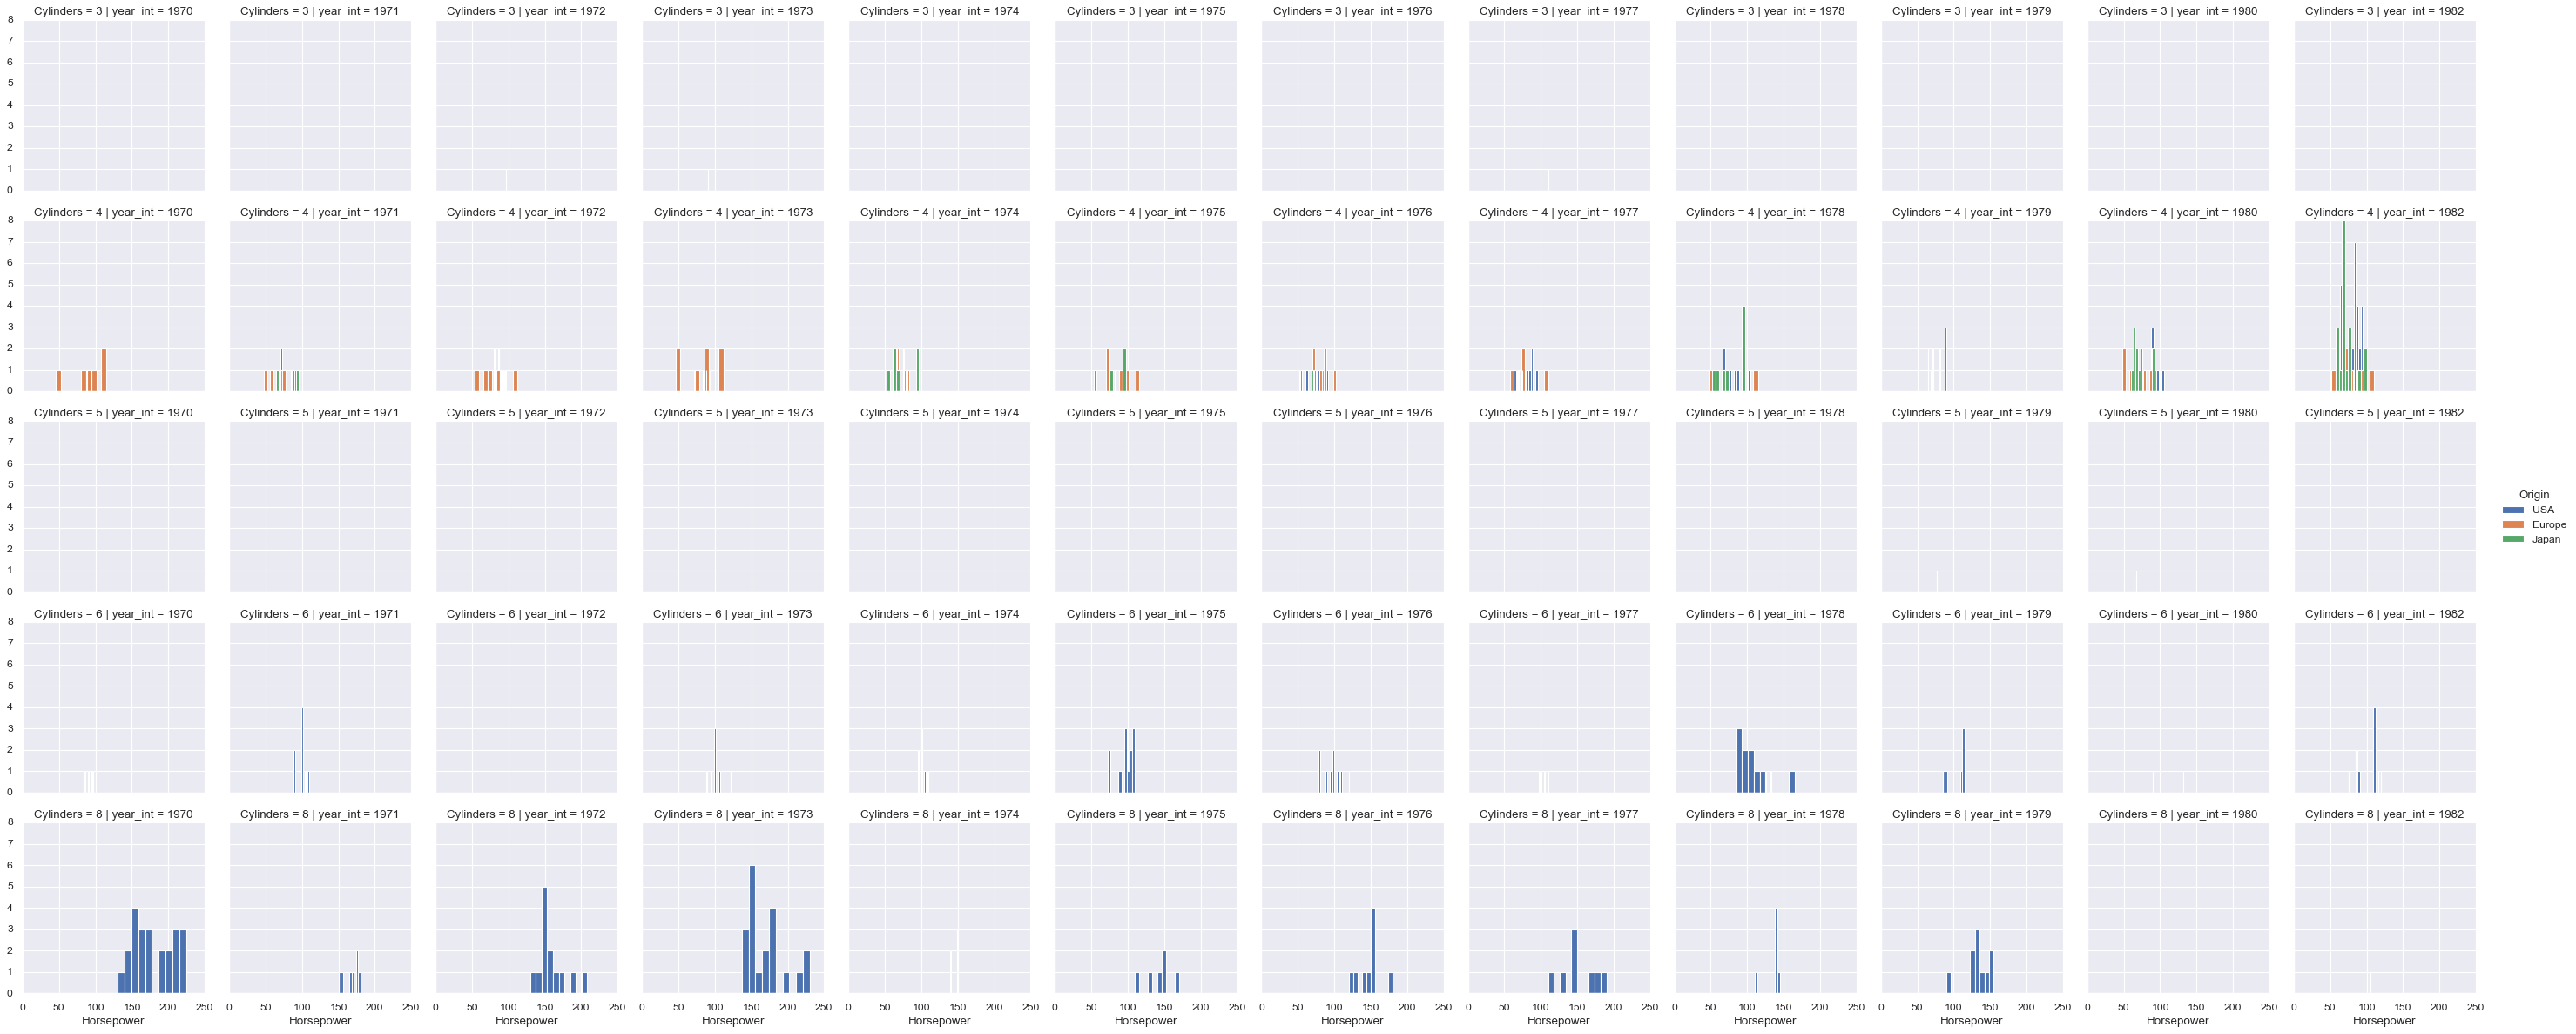

In [35]:
g = sns.FacetGrid(cars, row='Cylinders', col='year_int', hue='Origin')
g = g.map(plt.hist, 'Horsepower')
g.add_legend()


* Tutorials & References: https://seaborn.pydata.org/
* Example Gallery: https://seaborn.pydata.org/examples/index.html

In [36]:
from IPython.display import IFrame

IFrame(
    "https://seaborn.pydata.org/examples/index.html",
    width="100%",
    height=800,
)

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vega_datasets
from plotnine import *


In this section of the notebook, we talk ,about how can  we customize plots with matplotlib. With Seaborn and Plotnine, we can show lots of fancy plotting. However, they run matplotlib under the hood. In this part of the notebook, we see how can we customize the plots with matplotlib. 

you can read this blog for more customization tricks:
https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/customize-plot-colors-labels-matplotlib/

To do so, we are going to use `cars`gs dataset from `vega_datasets`  and we load it into `cars` variable. 

In [38]:
cars = vega_datasets.data.cars()
cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

# Customization with matplotlib
As both `seaborn` and `plotnine` use matplotlib to render the plots we can use all the matplotlib methods that we know and love to customize our plots.

## Customization for seaborn
In `seaborn` most functions just return a standard matplotib `Axes` object. As you can see when we Print the type of the plot, it gives us back a mathplotlib class. 
so we can use the methods from mathplotlib to customize the plots based on our needs.

<class 'matplotlib.axes._subplots.AxesSubplot'>


D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


[Text(0.5, 1.0, 'Distribution')]

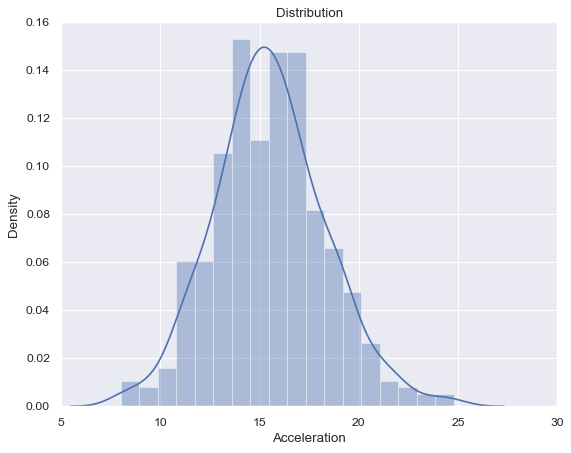

In [39]:
plot = sns.distplot(cars['Acceleration'])
print(type(plot))
plot.set(title='Distribution')

Alternatively, we can cerae subplots like we do in mathlotlib and pass an `Axes` to plot on.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


[Text(0.5, 1.0, 'Distribution'), Text(0.5, 0, 'acc')]

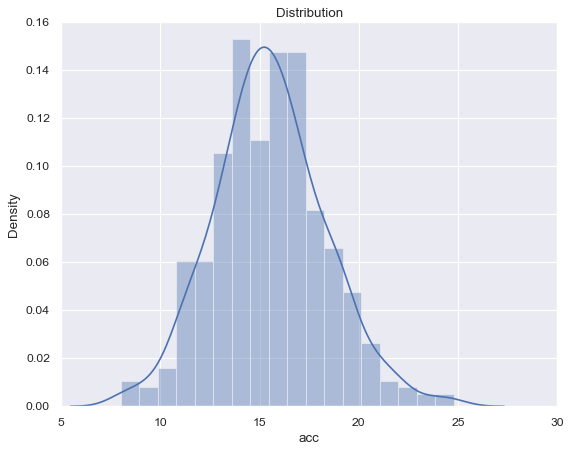

In [40]:
fig, ax = plt.subplots()
sns.distplot(cars['Acceleration'], ax=ax)
ax.set(title='Distribution', xlabel="acc")

## Customization for ggplot
With `ggplot` we have to call the `draw` method to obtain a reference to the matplotlib `figure`. first we pass the data and then we define what kind of plot do we want. And to project the plot, we call `draw` function to show the plot.

D:\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


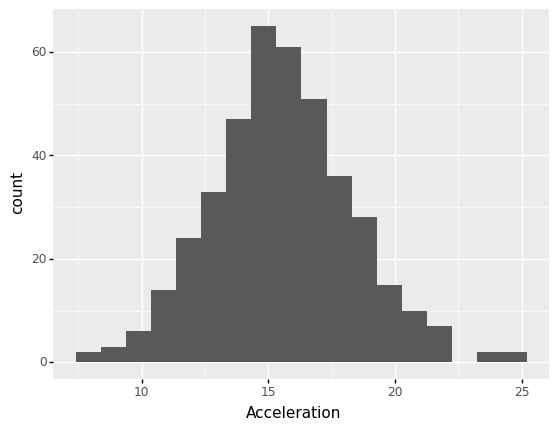

In [41]:
fig = (ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram()
).draw();

when we print the type of the figure, we can see that it gives us back a matplotlib figure. So we can do the regular customization from matplotlib. 

In [42]:
type(fig)

matplotlib.figure.Figure

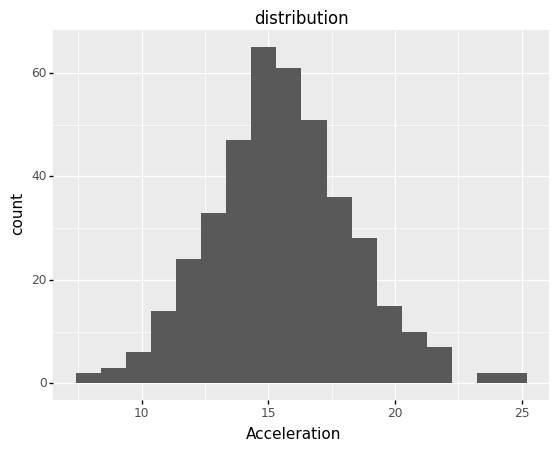

In [43]:
fig.axes[0].set(title='distribution')
fig

The same could be accomplished with *method chaining*.

D:\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


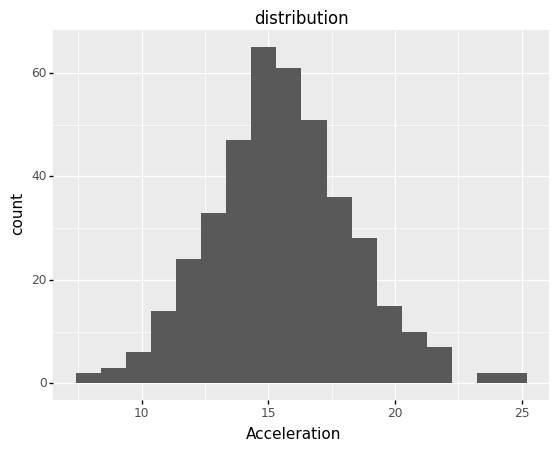

In [44]:

(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram()
).draw().axes[0].set(title='distribution');

## Exercise
Our first attempt at a violinplot with seaborn looked ok, but the x-ticklabels were overlapping. Let's fix this by passing using the power of matplotlib. Pass an `axes` to the seaborn function. Then rotate the x-ticklabels. You can use the following code to achieve the rotation

    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")

In [45]:
"see solutions.txt!"





'see solutions.txt!'

# Interactive Visualization

There are few actions less efficient in data exploration than re-running the same cell over and over again, each time slightly changing the input parameters. Further, when statically displaying data, there is no chance for any reader to look into the data in more detail, except by adding their own code. In this lecture, we will look at **interactive visualization**, that allows to display content with interactive controls to change inputs without needing to rewrite or rerun code.

## Plotly

Plotly is an interactive visualization library for python, that is not build ontop of matplotlib. It was originally meant for enterprise customers and wanted to run with Plotly's Chart Studio Cloud, which automatically stores your plots online, if you have an account. By now the online stuff seems to be opt-in and you can easily use it nonetheless without the online-constraint, and it automatically creates interactible plots as HTML.

Thanks to nice Jupyterlab-Extensions, these plots can also be rendered in Jupterlab.


If you are in your conda environment, simply use
``conda install -c plotly plotly``
and everything should run nicely.

In [46]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=[2, 1, 4, 3]))
fig.add_trace(go.Bar(y=[1, 4, 3, 2]))
fig.update_layout(title = 'Hello Figure')
fig.show()

In [47]:
fig.write_html('first_figure.html', auto_open=False)

In [48]:
from plotly.offline import plot
import plotly.io as pio
import plotly.graph_objects as go

data = [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])]
fig = go.Figure(data = data,layout = go.Layout(title='Offline Plotly Testing',width = 800,height = 500,
                                           xaxis = dict(title = 'X-axis'), yaxis = dict(title = 'Y-axis')))

#plot(fig) # shows it in html
pio.show(fig)

In [49]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]


fig = go.Figure(data = data,layout = go.Layout(title='Offline Plotly Testing',width = 800,height = 500,
                                           xaxis = dict(title = 'X-axis'), yaxis = dict(title = 'Y-axis')))

# plot(fig) # shows it in html
pio.show(fig)

### Replacing Pandas' plot()-backend

In [50]:
import plotly #>= 4.8 
assert int(plotly.__version__.split('.')[0]) > 4 or (int(plotly.__version__.split('.')[0]) == 4 and int(plotly.__version__.split('.')[1]) >= 8)

In [51]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
pd.options.plotting.backend = "plotly"

titanic.plot(kind='bar', x='Age', y='Survived')

<AxesSubplot:xlabel='Age'>

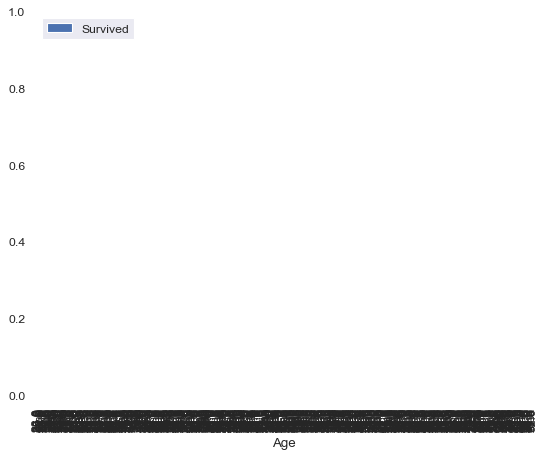

In [52]:
pd.reset_option("plotting.backend")

titanic.plot(kind='bar', x='Age', y='Survived')

* Example Gallery, Quick start, ...: https://plotly.com/python/
* How to plot Pandas DataFrames: https://medium.com/plotly/beyond-tidy-plotly-express-now-accepts-wide-form-and-mixed-form-data-bdc3e054f891

In [53]:
# This cell is just a fancy way to show the website inside the notebook
from IPython.display import IFrame
import ipywidgets as widgets

out = widgets.Output(layout={'border': '2px solid black'})
with out:
    display(IFrame(
        "https://plotly.com/python/",
        width="100%",
        height=700,
    ))
out

Output(layout=Layout(border='2px solid black'))

## Jupyter-Widgets

Widgets are eventful python objects that have a representation in Jupyter, often as a control like a slider, textbox, etc. Widgets can be used to build interactive data exploration and interactive GUIs, allowing us to turn Jupyter Notebooks from static documents into interactive dashboards, perfect for exploring and visualizing data.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vega_datasets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [55]:
def f(slope, intercept):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope * x + intercept)
    ax.set_ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, slope=(-2.0, 2.0), intercept=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=2.0, min=-2.0), FloatSlider(value=0.0, d…


Widgets have their own display `repr` which allows them to be displayed using IPython’s display framework. Constructing and returning an `IntSlider` automatically displays the widget.

In [56]:
widgets.IntSlider()

IntSlider(value=0)

Widgets can also be displayed by calling `display`. If you display the same widget twice, their front-end-representation will stay in sync:

In [57]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [58]:
display(w)

IntSlider(value=0)

Note that we can get its `value`, however if you simply return it its not interactive!

In [59]:
w.value

0

To do that, we can `jslink` these widgets:

In [60]:
w2 = widgets.Label()
widgets.jslink((w, 'value'), (w2, 'value'))
w2

Label(value='')

### The interact-function

At the most basic level, interact autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore.

In [61]:
def f(x):
    return x**2

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter. When this slider is moved, the function is called (over and over again) with the current value of x.

In [62]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

If you pass lists or dictionaries (not tuples!), it will make a dropdown menu:

In [63]:
#alternatively, passing a boolean creates a checkbox and passing a string a input
interact(lambda x: x, x={'one':1,'two':2});

interactive(children=(Dropdown(description='x', options={'one': 1, 'two': 2}, value=1), Output()), _dom_classe…

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments. Note also that passing a `float` will produce a different kind of slider: The `FloatSlider`:

In [64]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …